In [2]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from neuralnetwork import NeuralNetwork


In [3]:
# Run only if you need to install nltk.corpus and nltk.stem
#nltk.download()

In [4]:
# Read the data set and parse independent lines
fd = open("Assignment_2_data.txt","r")
file_data = fd.read()
lines = (file_data).splitlines()

In [5]:
# Create Necessary objects
ps = PorterStemmer()
y_target_names = []
x = []
stop_words = set(stopwords.words('english'))
unique_tokens = set()

In [6]:
# Pasing input file into labels and features 
for i in range(len(lines)): 
    # Splitting based on white space and non alpha numberic characters
    words_tokens = re.split('\W+',lines[i])
    words_tokens = list(filter(lambda temp: (temp != '' ),words_tokens)) 
    
    # Removing stop word from the data
    filtered_sentence = []
    for w in words_tokens:
        if w not in stop_words:
        # Applying porter stemmer
            stemmed_word = ps.stem(w).lower()
            filtered_sentence.append(stemmed_word)


    # Store pre processed data in x and y_target_names
    y_target_names.append(filtered_sentence[0])
    x.append(filtered_sentence[1:])
    unique_tokens.update(filtered_sentence[1:])

In [7]:
# Declare variables for one hot encoding
N = len(x)
unique_tokens = list(unique_tokens)
encoding_length = (len(unique_tokens))
x_encoded = np.zeros( ( N , encoding_length) )


In [8]:
# Binary encoding of features and labels
for i in range(N):
    for j in x[i]:
        ind = unique_tokens.index(j)
        x_encoded[i][ind] = 1;
        
y_target = np.ones((N,1))
for i in range(len(y_target_names)):
    if(y_target_names[i] == "ham"):
        y_target[i] = 0

In [9]:
# Split training and test error
trainN = int(0.8*N)

X_train = x_encoded[0:trainN]
y_train = y_target[0:trainN]

X_test = x_encoded[trainN:]
y_test = y_target[trainN:]

In [10]:
N,M = X_train.shape
print (X_train.shape)
print (y_train.shape)

(4459, 7375)
(4459, 1)


In [26]:
# Using tanh activation function without softmax layer 2A1
nn = NeuralNetwork(M,np.array([100,50]),1,weight_scale=1)

In [27]:
nn.train(X_train,y_train,X_test,y_test,epochs=500,learning_rate=0.1,learning_rate_decay=0.98,batch_size=1,bound=0.05)

-----------Ratio of Correct predictions over testset(371/1115)-----------
-----------Ratio of Correct predictions over training set(1517/4459)-----------
Epoch (1/500) Training Error : 0.486240
-----------Ratio of Correct predictions over testset(1030/1115)-----------
-----------Ratio of Correct predictions over training set(4098/4459)-----------
Epoch (2/500) Training Error : 0.265596
-----------Ratio of Correct predictions over testset(1033/1115)-----------
-----------Ratio of Correct predictions over training set(4203/4459)-----------
Epoch (3/500) Training Error : 0.216260
-----------Ratio of Correct predictions over testset(1054/1115)-----------
-----------Ratio of Correct predictions over training set(4273/4459)-----------
Epoch (4/500) Training Error : 0.169731
-----------Ratio of Correct predictions over testset(1032/1115)-----------
-----------Ratio of Correct predictions over training set(4168/4459)-----------
Epoch (5/500) Training Error : 0.155093
-----------Ratio of Correc

KeyboardInterrupt: 

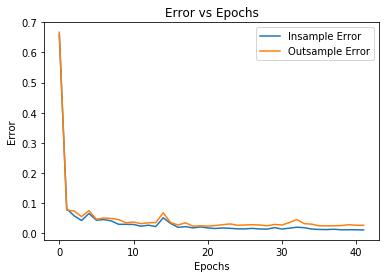

In [28]:
nn.plot()

In [14]:
# Sigmoid without softmax layer 2A2
nn2 = NeuralNetwork(M,np.array([100,50]),1,activation_function="sigmoid",weight_scale=1)

In [15]:
nn2.train(X_train,y_train,X_test,y_test,epochs=500,learning_rate=0.1,learning_rate_decay=0.98,batch_size=1,bound=0.009)

-----------Ratio of Correct predictions over testset(145/1115)-----------
-----------Ratio of Correct predictions over training set(602/4459)-----------
Epoch (1/500) Training Error : 0.097693
-----------Ratio of Correct predictions over testset(1027/1115)-----------
-----------Ratio of Correct predictions over training set(4164/4459)-----------
Epoch (2/500) Training Error : 0.046529
-----------Ratio of Correct predictions over testset(1046/1115)-----------
-----------Ratio of Correct predictions over training set(4291/4459)-----------
Epoch (3/500) Training Error : 0.031057
-----------Ratio of Correct predictions over testset(1057/1115)-----------
-----------Ratio of Correct predictions over training set(4341/4459)-----------
Epoch (4/500) Training Error : 0.023489
-----------Ratio of Correct predictions over testset(1065/1115)-----------
-----------Ratio of Correct predictions over training set(4366/4459)-----------
Epoch (5/500) Training Error : 0.018856
-----------Ratio of Correct

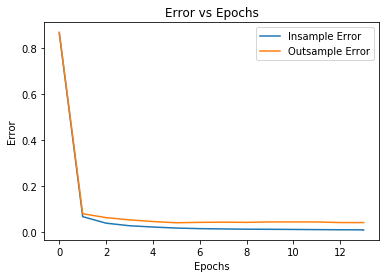

In [16]:
nn2.plot()

In [11]:
# Using sigmoid activation function with softmax layer 2B1
nn = NeuralNetwork(M,np.array([100,50]),2,activation_function="sigmoid",weight_scale=1)

In [12]:
nn.train(X_train,y_train,X_test,y_test,epochs=1000,learning_rate=1e-1,learning_rate_decay=0.98,batch_size=1,method="two",bound=0.009)

-----------Ratio of Correct predictions over testset(149/1115)-----------
-----------Ratio of Correct predictions over training set(608/4459)-----------
Epoch (1/1000) Training Error : 0.139306
-----------Ratio of Correct predictions over testset(969/1115)-----------
-----------Ratio of Correct predictions over training set(3867/4459)-----------
Epoch (2/1000) Training Error : 0.118715
-----------Ratio of Correct predictions over testset(992/1115)-----------
-----------Ratio of Correct predictions over training set(3981/4459)-----------
Epoch (3/1000) Training Error : 0.074170
-----------Ratio of Correct predictions over testset(1035/1115)-----------
-----------Ratio of Correct predictions over training set(4222/4459)-----------
Epoch (4/1000) Training Error : 0.042866
-----------Ratio of Correct predictions over testset(1054/1115)-----------
-----------Ratio of Correct predictions over training set(4327/4459)-----------
Epoch (5/1000) Training Error : 0.027703
-----------Ratio of Corr

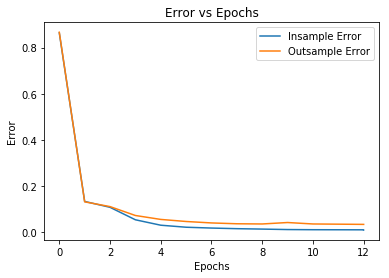

In [13]:
nn.plot()